In [150]:
# Imports

import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib import pyplot as plt
from scipy import misc, ndimage
import imageio
import cv2
from scipy.signal.fir_filter_design import fft

C:\Users\ivanv\AppData\Local\Temp/ipykernel_6260/1249363856.py:9: DeprecationWarning: Please use `fft` from the `scipy.signal` namespace, the `scipy.signal.fir_filter_design` namespace is deprecated.
  from scipy.signal.fir_filter_design import fft


# Pregunta 1

In [140]:
x = np.linspace(-1, 1, 1000)
sigma = 1

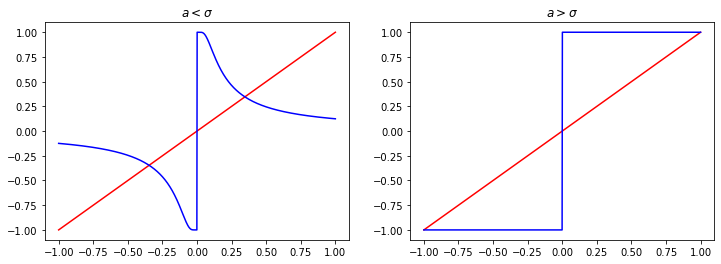

In [148]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

fn = np.tanh((0.5 ** 2 / sigma ** 2) / (x / 0.5))
ax[0].plot(x, x, color = "red")
ax[0].plot(x, fn, color = "blue")
ax[0].set_title('$a < \sigma$')


fn = np.tanh((2 ** 2 / sigma ** 2) / (x / 2))
ax[1].plot(x, x, color = "red")
ax[1].plot(x, fn, color = "blue")
ax[1].set_title('$a > \sigma$')

plt.show()

# Pregunta 2

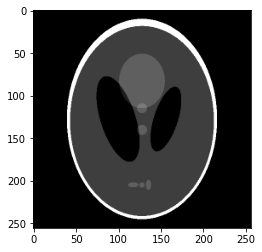

In [70]:
imagen = cv2.imread('shepp_logan.png', 0)

plt.imshow(imagen, cmap = 'Greys_r')
plt.show()

In [71]:
x, y = imagen.shape

print(f'Tamaño: ({x}, {y})')

Tamaño: (256, 256)


In [73]:
def fftc(X):
    return fftshift(fft2(ifftshift(X)))
def ifftc(X):
    return fftshift(ifft2(ifftshift(X)))

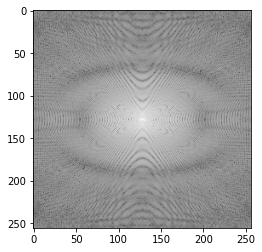

In [94]:
# Aquí centramos las freuencias
fft_img = fftc(imagen)
plt.imshow(np.log10(abs(fft_img)), cmap = 'Greys_r')
plt.show()

In [95]:
def recortar(imagen, tamano):
    x, y = imagen.shape
    minimo = abs(tamano // 2 + x // 2)
    maximo = abs(tamano // 2 - x // 2)

    copia = imagen.copy()

    for i in range(x):
        for j in range(y):
            if i < maximo or j < maximo or i > minimo or j > minimo:
                copia[i][j] = 0

    return copia

C:\Users\ivanv\AppData\Local\Temp/ipykernel_6260/1212901920.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(fft_recortada)), cmap = 'Greys_r')


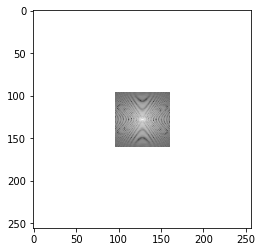

In [102]:
fft_recortada = recortar(fft_img, 64)
plt.imshow(np.log10(abs(fft_recortada)), cmap = 'Greys_r')
plt.show()

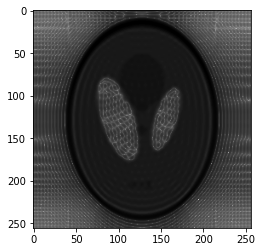

In [109]:
ifft_img = ifftc(fft_recortada)
plt.imshow(np.log10(abs(ifft_img)), cmap = 'binary')
plt.show()

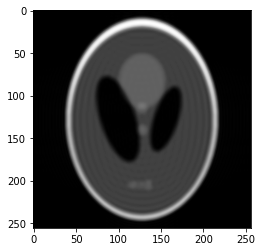

In [105]:
n = np.hamming(64)
hamming2d = np.sqrt(np.outer(n, n))
hamming2d_pad = np.pad(hamming2d,(96, 96))

producto = fft_recortada * hamming2d_pad
inversa = ifftc(producto)

plt.imshow(abs(inversa), cmap = 'Greys_r')
plt.show()

# Pregunta 3

In [115]:
image = cv2.imread('Zone720-HardEdge-A-Crop-Resize.png', 0)
dx = 2 ** -12
dy = 2 ** -12

In [117]:
def posicion(m, n):
    pos = ((0.5 + m) * dx, (0.5 + n) * dy)
    return pos

In [121]:
resoluciones = (
    (2.5, (0, 0)),
    (5, (0, 1)),
    (7.5, (1, 0)),
    (10, (1, 1)),
    (25, (2, 0)),
    (50, (2, 1))
)

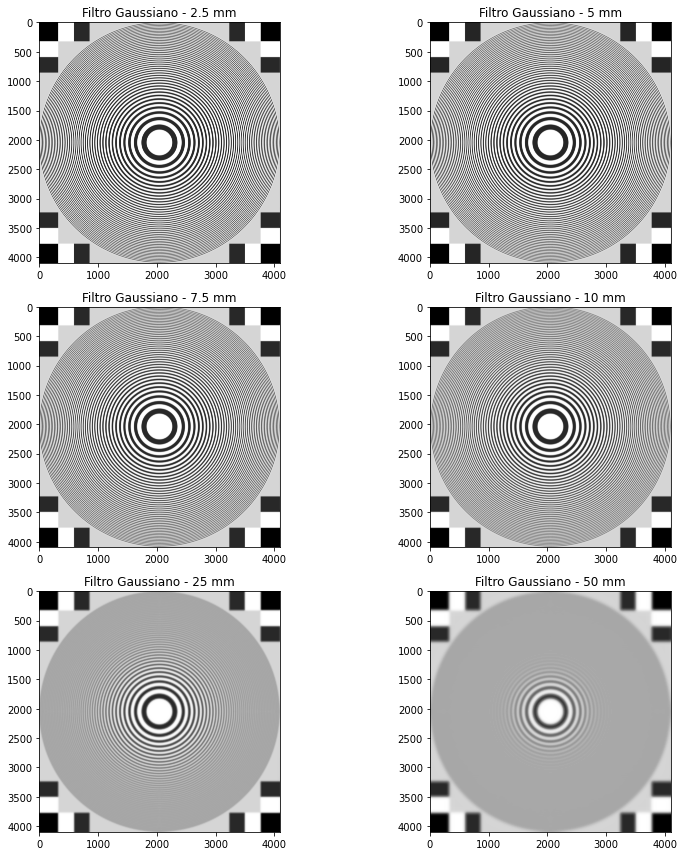

In [125]:
fig, ax = plt.subplots(3, 2, figsize = (12, 12))

for resolucion, pos in resoluciones:
    blur_G = ndimage.gaussian_filter(image, sigma = resolucion / 2)
    ax[pos[0], pos[1]].set_title(f"Filtro Gaussiano - {resolucion} mm")
    ax[pos[0], pos[1]].imshow(blur_G, cmap = 'Greys_r')
    
plt.tight_layout()
plt.show()

# Pregunta 4

In [127]:
image = cv2.imread('Zone720-HardEdge-A-Crop-Resize.png', 0)
fft_image = fftc(image)

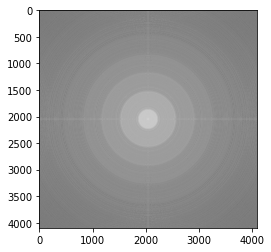

In [151]:
# Transformada de la imagen
plt.imshow(np.log10(1 + abs(fft_image)), cmap = 'Greys_r')
plt.show()

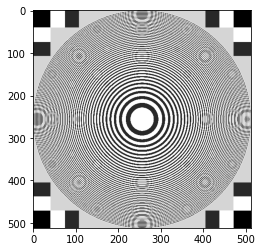

In [152]:
x, y = image.shape
tamano_muestra = 8
imagen_nueva = np.zeros((x // tamano_muestra, y // tamano_muestra), dtype=int)
for i in range(0, x, tamano_muestra):
    for j in range(0, y, tamano_muestra):
        try:
            imagen_nueva[i // tamano_muestra][j // tamano_muestra] = image[i][j]
        except IndexError:
            pass

# Imagen muestreada
plt.imshow(imagen_nueva, cmap = 'Greys_r')
plt.show()

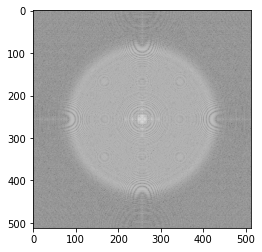

In [153]:
fft_nueva = fftc(imagen_nueva)

# Transformada de la imagen muestreada
plt.imshow(np.log10(1 + abs(fft_nueva)), cmap = 'Greys_r')
plt.show()

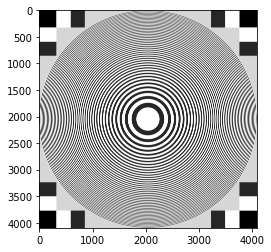

In [154]:
blur_G = ndimage.gaussian_filter(image, sigma = 1.25 / 2)

# Imagen filtrada
plt.imshow(blur_G, cmap = 'Greys_r')
plt.show()

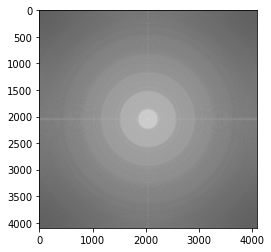

In [155]:
fft_blur = fftc(blur_G)

# Transformada imagen filtrada
plt.imshow(np.log10(1 + abs(fft_blur)), cmap = 'Greys_r')
plt.show()

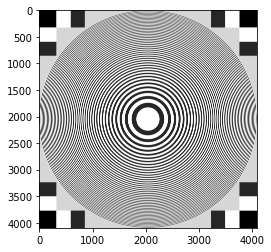

In [156]:
blur_G2 = ndimage.gaussian_filter(image, sigma = 1.25 / 2)

# Imaagen muestreada con filtro Gaussiano
plt.imshow(blur_G2, cmap = 'Greys_r')
plt.show()